## Curve fitting using pure Python and numpy

### Heather Tweedie, 18/01/2023

In [16]:
import numpy as np
from numpy import zeros
from matplotlib import pyplot as plt


We first define the function `polyModelWithNoise` to calculate the polynomial $$ y(x) = \sum_i \theta_i x^i $$ with noise of standard deviation $\sigma$ added.

In [17]:

def polyModelWithNoise(x, theta, sigma):
    """
    Plots a sample of 100 points arranged between 0 and 1 for an nth order polynomial, with noise.
    For no noise, sigma = 0.
    
    Args:
        x: a numpy array of x values
        theta: a list of [theta_1, ... , theta_n], parameters for the polynomial
        sigma: the standard deviation of the noise

    Returns:
        A numpy array of f(x, theta)
    """

    # initialise an empty array of length x
    x = np.array(x)
    y = zeros(x.size)

    # loop over all values of theta for all values of x to calculate each
    # term of the polynomial for each value of x
    for j in range(x.size):
        x_temp = x[j]
        y_temp = zeros(len(theta))
        for i in range(len(theta)):
            y_temp[i] = theta[i] * (x[j] ** i)
        y[j] = sum(y_temp) + (sigma * np.random.randn())   # add noise

    return y


We then generate a random sample of x values with which we calculate corresponding y values using the function defined above. We use $\theta = [0, 2]$ and $\sigma = 0.5$.

Text(0.5, 1.0, 'Randomly sampled x and y values for 1st order polynomial')

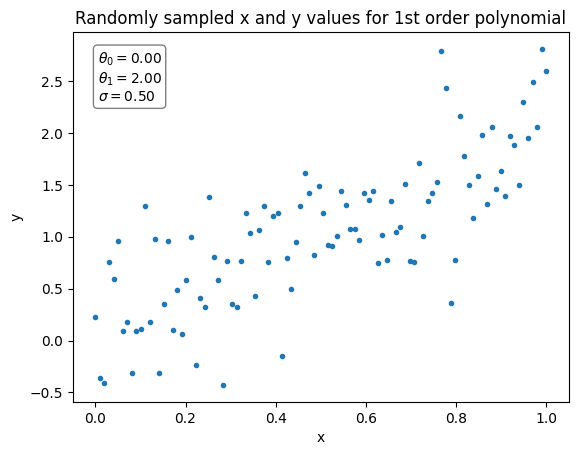

In [18]:
# calculate a random sample of linearly spaced x values, and their corresponding y values
data_x_1 = np.linspace(0, 1, 100)
theta = [0, 2]
sigma = 0.5
data_y_1 = polyModelWithNoise(data_x_1, theta, sigma)

# plot these data
textstr = '\n'.join((
    r'$\theta_0=%.2f$' % (theta[0], ),
    r'$\theta_1=%.2f$' % (theta[1], ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

fig, ax = plt.subplots()
ax.plot(data_x_1, data_y_1, 'o', markersize = 3)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Randomly sampled x and y values for 1st order polynomial')


We now define the function `polyGradient` to calculate the gradient of the polynomial with respect to $\theta$. 

In [19]:
def polyGradient(x, theta):
    """
    Returns the gradient of the nth order polynomial function with respect to theta.
    
    Args:
        x: a numpy array of x values
        theta: a list of [theta_1, ... , theta_n], parameters of the polynomial

    Returns:
        An n-dimensional array of the derivitives of each theta term in the polynomial, for each value of x
    """

    derivs = zeros((len(theta), len(x)))
    for i in range(len(theta)):
        for j in range(len(x)):
            derivs[i,j] = (x[j] ** i)

    return derivs

    

We now define a number of functions to be used during the implementation of the stochastic descent algorithm. 

In [20]:
def get_new_theta(x, theta, eta, sigma, model_y, true_y):
    """
    Finds the new theta on the path using the gradient descent algorithm.

    Params:
        theta: a list of [theta_1, ..., theta_n], the parameters of the polynomial
        eta: the learning rate
        sigma: ??
        model_y: a numpy array of model y values
        true_y: a numpy array of true y values

    Returns:
        A list of [theta1, ... , thetan], the new parameters of the polynomial
    """

    deviation = np.array(model_y - true_y)
    grad_f = np.array(polyGradient(x, theta))
    new_theta = theta - eta * np.average(deviation[None,:] * grad_f, axis = 1)
    
    return new_theta



def get_chi_sq(model_y, true_y, true_sigma):
    """
    Calculates the chi-squared value for the model and the true function we are trying to fit to.
    
    Params:
        model_y: the model we are trying to fit
        true_y: the true function we are fitting to
        true_sigma: the standard deviation of the noise of the true function
        
    Returns:
        The chi-squared value
    """
    
    chi_sq = 0
    for i in range(len(model_y)):
        chi_sq += ((model_y[i] - true_y[i]) / true_sigma) ** 2

    return chi_sq



def stochastic_grad_desc(num_steps, start_theta, true_theta, true_sigma, eta):
    """
    Implements the stochastic gradient descent algorithm.
    
    Params:
        num_steps: the number of steps to take
        start_theta: a list of [theta_1, ..., theta_n], the starting values for theta
        true_theta: a list of [theta_1, ..., theta_n], the values of theta for the true function
        true_sigma: the standard deviation of the noise of the true function
        eta: the learning rate
    
    Returns:
        theta_path: the path taken to minimise the gradient of chi-sq
        chi_sq_path: the chi-sq minimisation path taken
    """

    theta = start_theta
    theta_path = zeros((num_steps + 1, len(start_theta)))     # initialise empty path array
    theta_path[0] = theta    # path starts at theta
    chi_sq_path = zeros((num_steps + 1, len(start_theta))) 

    for i in range(num_steps):
        x = np.random.uniform(0, 1, 10)
        true_y = np.array(polyModelWithNoise(x, true_theta,  true_sigma))
        model_y = np.array(polyModelWithNoise(x, theta, 0))
        chi_sq_path[i] = get_chi_sq(model_y, true_y, true_sigma)
        theta = get_new_theta(x, theta, eta, sigma, model_y, true_y)  # update theta
        theta_path[i+1] = theta  # update path with new theta

    return theta_path, chi_sq_path


We now carry out the stochastic gradient descent algorithm using the functions defined above, to fit a 1st order polynomial to the polynomial with noise added.

Text(0.5, 1.0, '1st order polynomial fitted to test data')

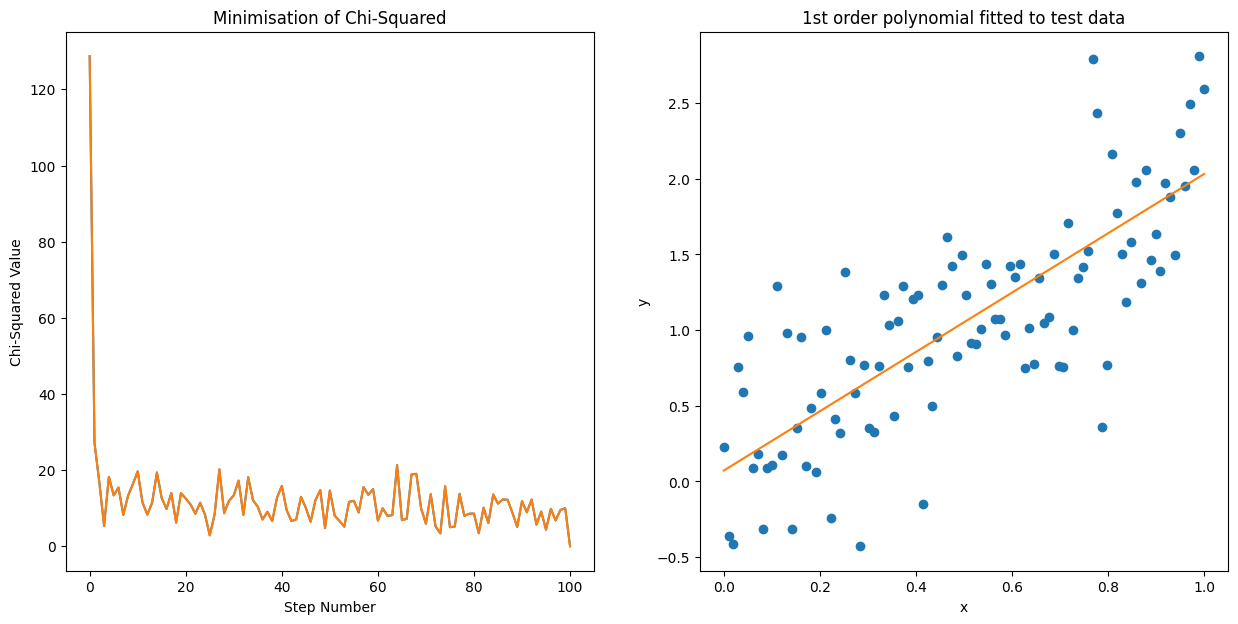

In [21]:
# Implement stochastic gradient descent algorithm to fit a first order polynomial

NUM_STEPS = 100
START_THETA = [-1, 0.5]
TRUE_THETA_1 = [0, 2]
TRUE_SIGMA = 0.5
ETA = 0.5

# fit first order polynomial
theta_pol_1, chi_sq_pol_1 = stochastic_grad_desc(NUM_STEPS, START_THETA, TRUE_THETA_1, TRUE_SIGMA, ETA)

fig, ax = plt.subplots(1, 2, figsize = [15, 7])

# plot convergence of chi_sq to minimum
ax[0].plot(range(len(chi_sq_pol_1)), chi_sq_pol_1)
ax[0].set_xlabel('Step Number')
ax[0].set_ylabel('Chi-Squared Value')
ax[0].set_title('Minimisation of Chi-Squared')

# calculate the y values given theta calculated from minimising the chi-sq value
final_theta = theta_pol_1[-1]
y_final = polyModelWithNoise(data_x_1, final_theta, 0)

# plot test data and model
ax[1].plot(data_x_1, data_y_1, 'o')
ax[1].plot(data_x_1, y_final)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('1st order polynomial fitted to test data')


The value of chi-squared is minimised to about 15. The model appears to fit the test data relatively well.

We now attempt to model a 3rd order polynomial using 1st, 3rd, and 7th order polynomials. We start generating a random sample of x values with which we calculate corresponding y values using the `polyModelWithNoise` function. We use $\theta = [0, 2, 2, 2]$ and $\sigma = 0.5$, then use the stochastic gradient descent algorithm three times to fit 1st, 3rd and 7th order polynomials to these test data.

In [22]:
# calculate a random sample of linearly spaced x values, and their corresponding y values
data_x_3 = np.linspace(-0.5, 1.5, 100)
theta = [0, 2, 2, 2]
sigma = 0.5
data_y = polyModelWithNoise(data_x_3, theta, sigma)


In [23]:
# Implement stochastic gradient descent algorithm to fit a third order polynomial

NUM_STEPS = 100
START_THETA_1 = [-1, 0.5]
START_THETA_3 = [-1, 0.5, 0.5, 0.5]
START_THETA_7 = [-1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
TRUE_THETA = [0, 2, 2, 2]
TRUE_SIGMA = 0.5
ETA = 0.5

# fit first order polynomial
theta_pol_1, chi_sq_pol_1 = stochastic_grad_desc(NUM_STEPS, START_THETA_1, TRUE_THETA, TRUE_SIGMA, ETA)

# fit third order polynomial
theta_pol_3, chi_sq_pol_3 = stochastic_grad_desc(NUM_STEPS, START_THETA_3, TRUE_THETA, TRUE_SIGMA, ETA)

# fit seventh order polynomial
theta_pol_7, chi_sq_pol_7 = stochastic_grad_desc(NUM_STEPS, START_THETA_7, TRUE_THETA, TRUE_SIGMA, ETA)

# calculate the y values given theta calculated from minimising the chi-sq value
final_theta_1 = theta_pol_1[-1]
final_theta_3 = theta_pol_3[-1]
final_theta_7 = theta_pol_7[-1]
y_final_1 = polyModelWithNoise(data_x_3, final_theta_1, 0)
y_final_3 = polyModelWithNoise(data_x_3, final_theta_3, 0)
y_final_7 = polyModelWithNoise(data_x_3, final_theta_7, 0)


Text(0.5, 1.0, '1st, 3rd and 7th order polynomials fitted to 3rd order test data')

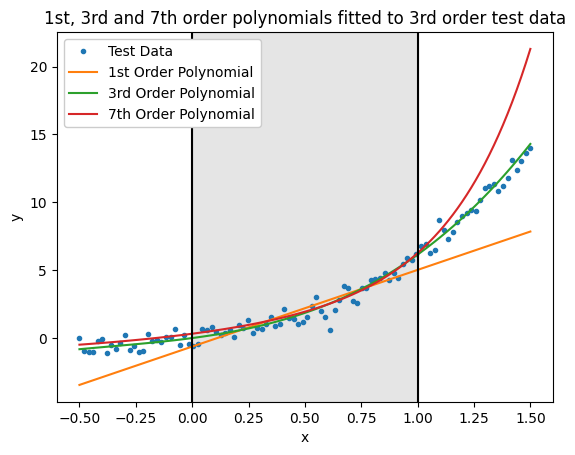

In [24]:
# plot test data with fitted polynomials
fig, ax = plt.subplots()
ax.plot(data_x_3, data_y, 'o', markersize = 3, label = 'Test Data')
ax.plot(data_x_3, y_final_1, label = '1st Order Polynomial')
ax.plot(data_x_3, y_final_3, label = '3rd Order Polynomial')
ax.plot(data_x_3, y_final_7, label = '7th Order Polynomial')
ax.axvline(0, 0, 1, color = 'k')
ax.axvline(1, 0, 1, color = 'k')
ax.axvspan(0, 1, alpha = 0.1, color = 'k')
ax.legend(loc = 'upper left', framealpha = 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('1st, 3rd and 7th order polynomials fitted to 3rd order test data')

All three polynomial models fit the data over which they were trained relatively well. However, when the range of x is increased beyond the training sample (shaded grey in the plot above), it is clear that the 3rd order polynomial model fits the data most accurately.